In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Handle missing values

In [6]:
df.isnull().sum()   

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Handling duplicates

In [7]:
df.duplicated().sum()

0

# Exploratory Data Analysis , Data Cleaning & Data Preprocessing

## Single Variable

### Age

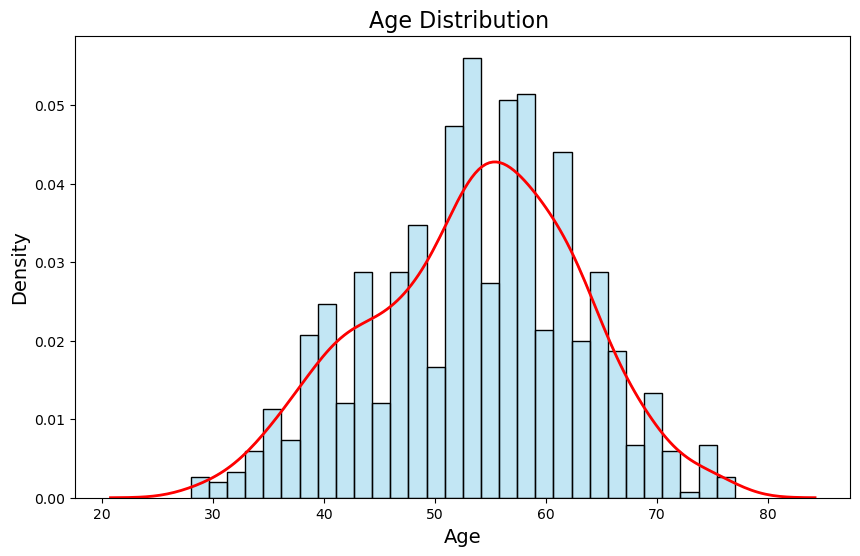

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['Age'], color='red', linewidth=2) 
plt.title('Age Distribution ', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.Age.describe())

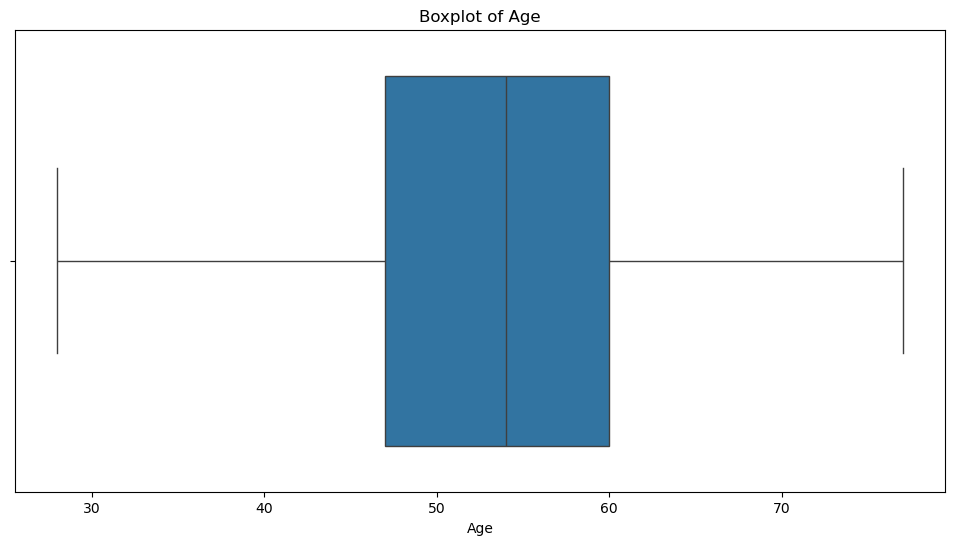

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

- no noisy data or outliers found

### Sex

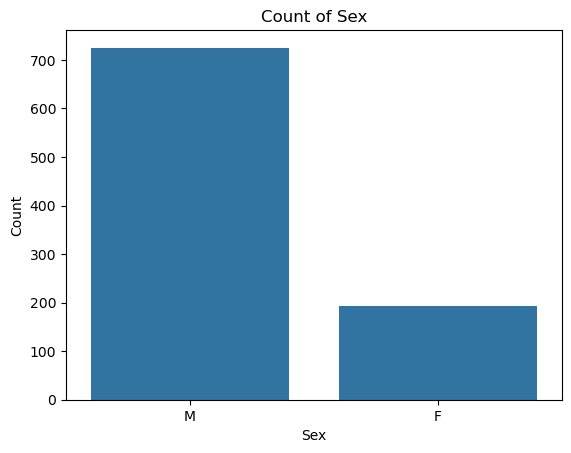

Sex
M    725
F    193
Name: count, dtype: int64

In [10]:
sns.countplot(x='Sex', data=df)
plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

df['Sex'].value_counts()

### ChestPainType

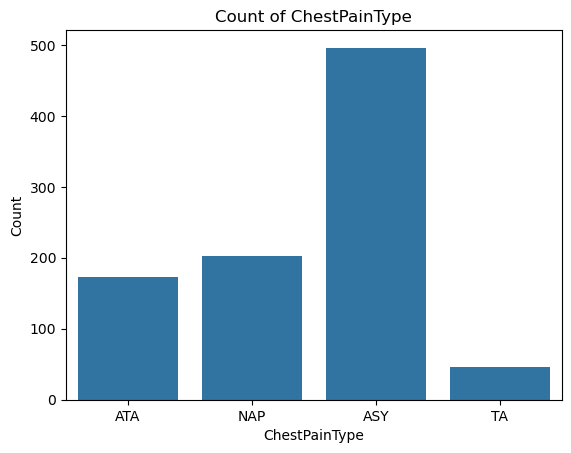

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
sns.countplot(x='ChestPainType', data=df)
plt.title('Count of ChestPainType')
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.show()

df['ChestPainType'].value_counts()

In [12]:
df['ChestPainType'].value_counts()/df.shape[0] *100 # ChestPainType distribution percentage

ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: count, dtype: float64

- The data shows the distribution of chest pain types, with ASY being the most common (54.03%), followed by NAP (22.11%), ATA (18.85%), and TA (5.01%).

### RestingBP

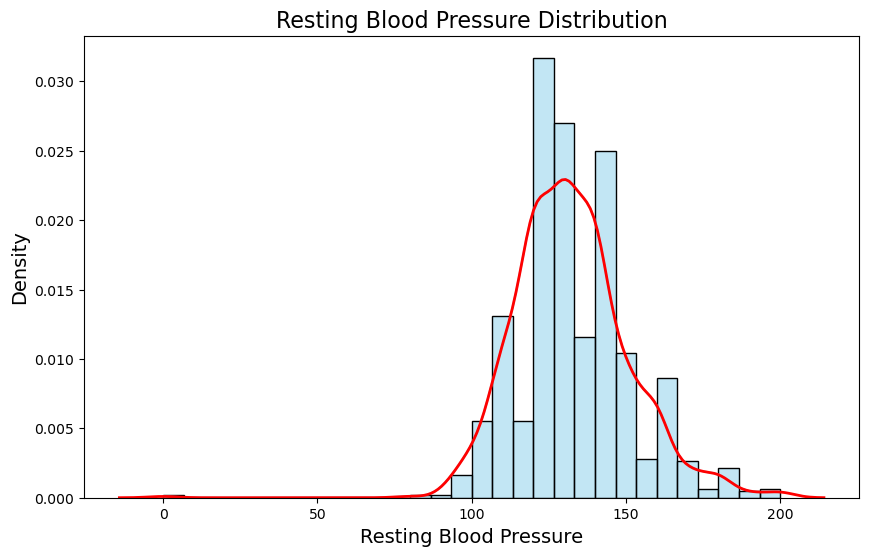

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64


In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RestingBP'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['RestingBP'], color='red', linewidth=2) 
plt.title('Resting Blood Pressure Distribution', fontsize=16)
plt.xlabel('Resting Blood Pressure', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.RestingBP.describe())

- bell-shaped distribution

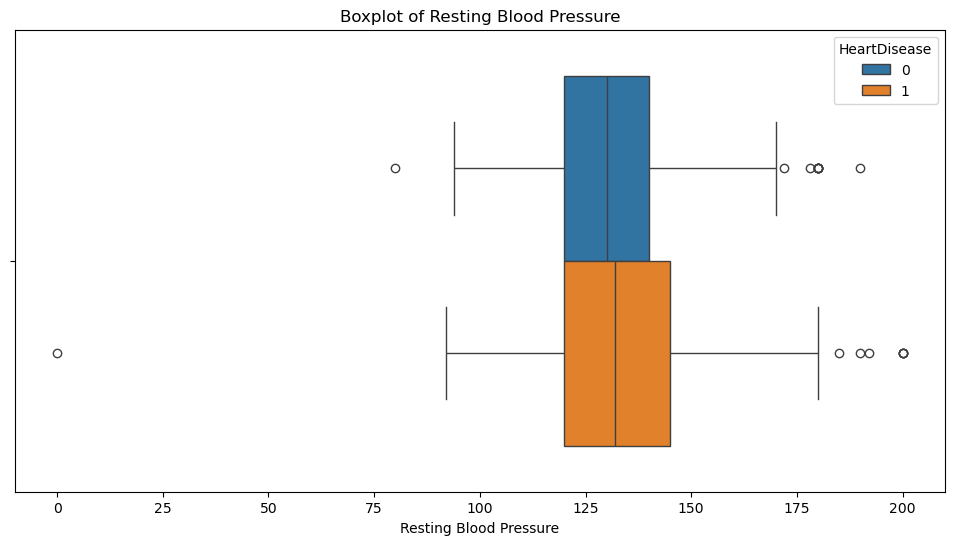

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RestingBP', data=df,hue='HeartDisease')
plt.title('Boxplot of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
plt.show()

In [15]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
max = df['RestingBP'].max()
min = df['RestingBP'].min()
print(f"Q1: {Q1}, Q3: {Q3}, Max: {max}, Min: {min}")
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_normal = df[( (df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound) ) & (df['HeartDisease'] == 0)]
outliers_heartDisease = df[( (df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound) ) & (df['HeartDisease'] == 1)]
# Count the number of outliers
print(f'Number of outliers (normal): {outliers_normal.shape[0]}')
print(f'Number of outliers (heart disease): {outliers_heartDisease.shape[0]}')

Q1: 120.0, Q3: 140.0, Max: 200, Min: 0
Number of outliers (normal): 10
Number of outliers (heart disease): 18


- we have 28 outliers in total for this attribute

In [16]:
# Display the outliers
df[(df['RestingBP'] < lower_bound) | (df['RestingBP'] > upper_bound)].loc[:, ['RestingBP','HeartDisease']]

,RestingBP,HeartDisease
109,190,0
123,180,1
189,180,1
190,180,0
241,200,1
274,180,0
275,180,0
278,180,0
314,80,0
365,200,1


Analyze whether this would have an effect on out response variable - Heart Disease

##### Handle Noise

- 0 Resting BP must be an invalid data due to error in collection of data, we will remove this row
- In medical context, resting BP around 180 is treated as (severe hypertension), it is still valid data point , we will keep of them for analysis as 27 outliers is still moderate amount in 918 observations

In [17]:
df=df[df['RestingBP'] != 0]
df.shape

(917, 12)

### Cholesterol

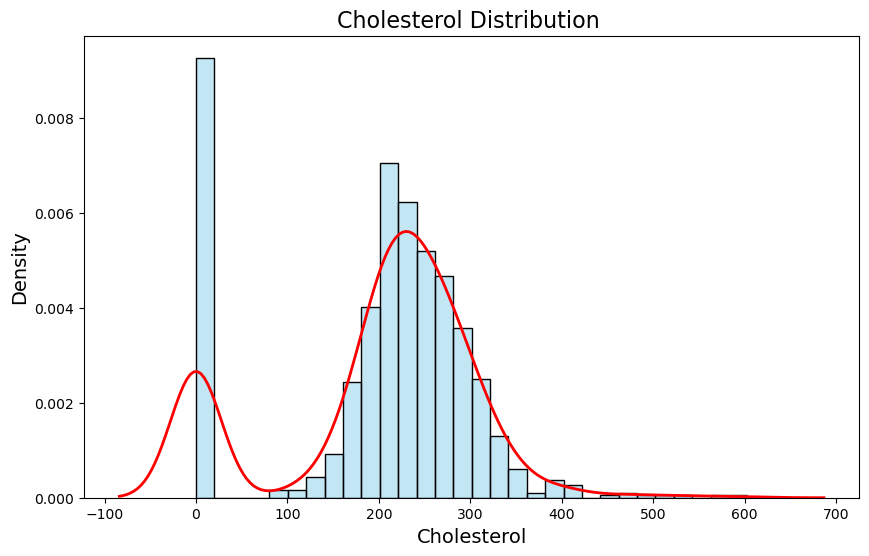

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['Cholesterol'], color='red', linewidth=2) 
plt.title('Cholesterol Distribution ', fontsize=16)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.Cholesterol.describe())

- bimodal distribution identified, with a significant amount of data  cholestrol = 0

##### Handle Noise

In [19]:
df[df['Cholesterol'] == 0].count() 

Age               171
Sex               171
ChestPainType     171
RestingBP         171
Cholesterol       171
FastingBS         171
RestingECG        171
MaxHR             171
ExerciseAngina    171
Oldpeak           171
ST_Slope          171
HeartDisease      171
dtype: int64

- 171 cholestrol values are 0 

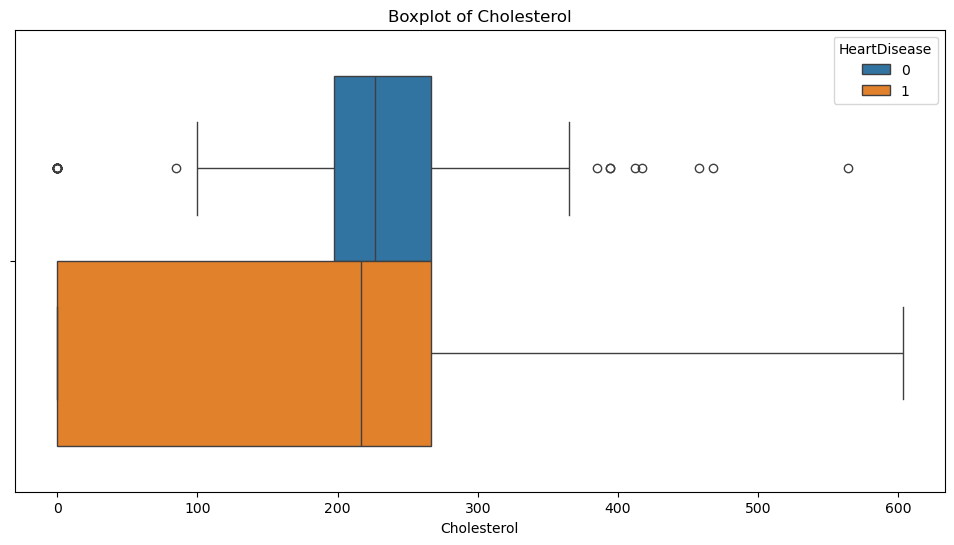

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cholesterol', data=df,hue='HeartDisease')
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

- Since 0 cholestrol level is impossible in medical context, these zero values are interpreted as miscollect data or values that are imputed manually
- We would remove all these 171 values

In [21]:
df=df[df['Cholesterol']!=0]

In [22]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


- Re-plot Histogram & box plot again

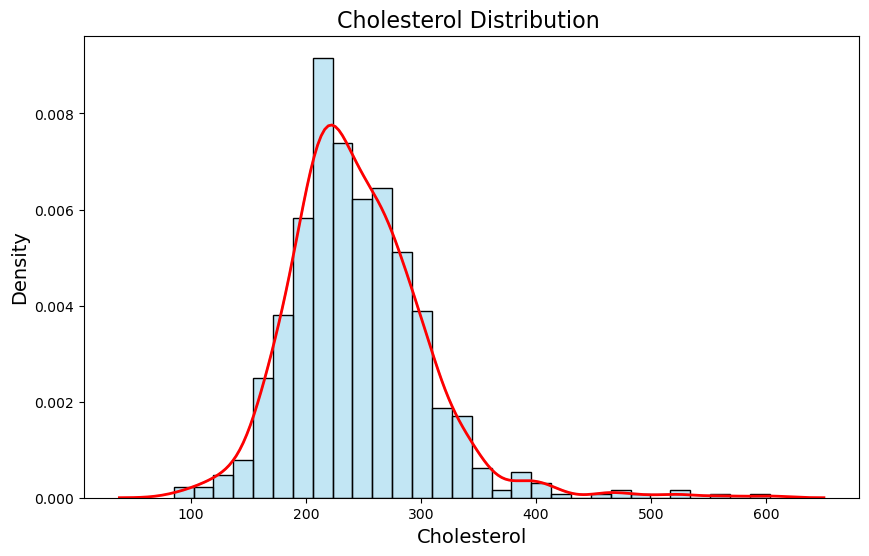

count    746.000000
mean     244.635389
std       59.153524
min       85.000000
25%      207.250000
50%      237.000000
75%      275.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cholesterol'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['Cholesterol'], color='red', linewidth=2) 
plt.title('Cholesterol Distribution ', fontsize=16)
plt.xlabel('Cholesterol', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.Cholesterol.describe())

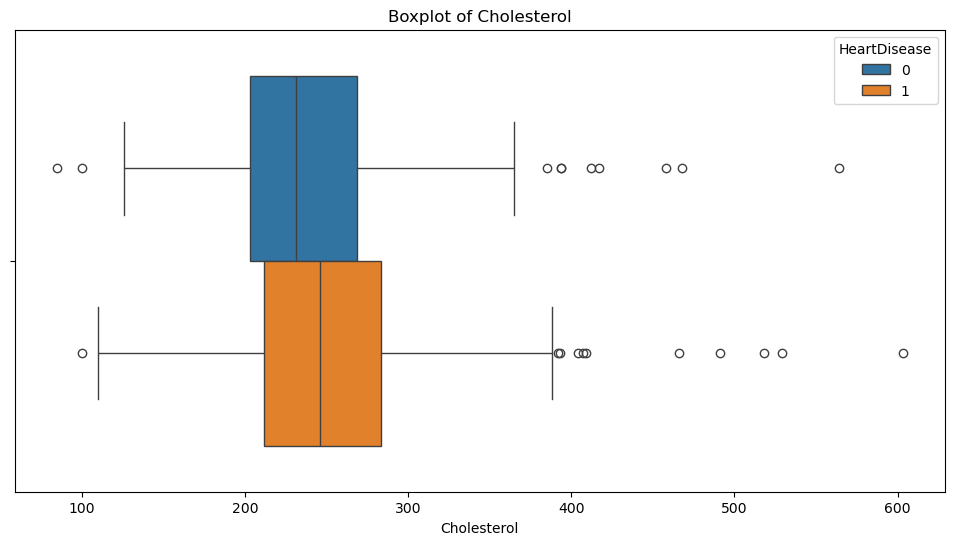

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cholesterol', data=df,hue='HeartDisease')
plt.title('Boxplot of Cholesterol')
plt.xlabel('Cholesterol')
plt.show()

In [25]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
max = df['Cholesterol'].max()
min = df['Cholesterol'].min()
print(f"Q1: {Q1}, Q3: {Q3}, Max: {max}, Min: {min}")
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_normal = df[( (df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound) ) & (df['HeartDisease'] == 0)]
outliers_heartDisease = df[( (df['Cholesterol'] < lower_bound) | (df['Cholesterol'] > upper_bound) ) & (df['HeartDisease'] == 1)]
# Count the number of outliers
print(f'Number of outliers (normal): {outliers_normal.shape[0]}')
print(f'Number of outliers (heart disease): {outliers_heartDisease.shape[0]}')

Q1: 207.25, Q3: 275.0, Max: 603, Min: 85
Number of outliers (normal): 10
Number of outliers (heart disease): 13


- both class have similar number of outliers and 23 outliers in 746 observations (around 3 %) is moderate. We would keep the remaining in our analysis

### FastingBS

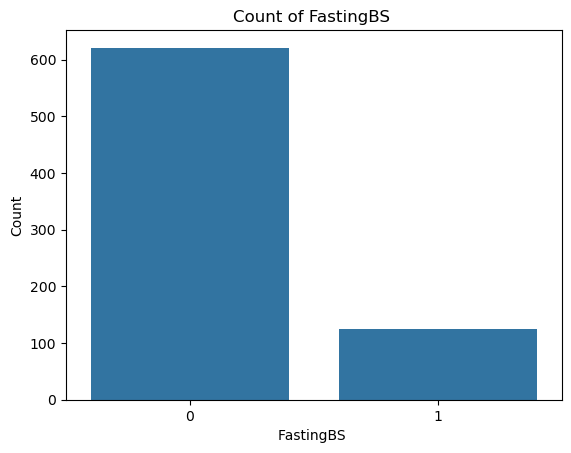

FastingBS
0    621
1    125
Name: count, dtype: int64

In [26]:
sns.countplot(x='FastingBS', data=df)
plt.title('Count of FastingBS ')
plt.xlabel('FastingBS ')
plt.ylabel('Count')
plt.show()

df['FastingBS'].value_counts()

### RestingECG

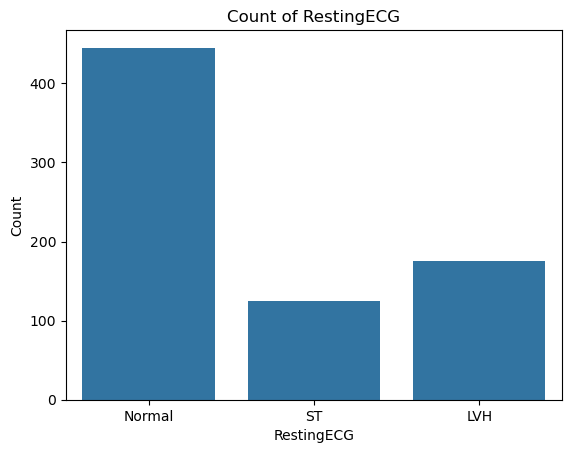

RestingECG
Normal    445
LVH       176
ST        125
Name: count, dtype: int64

In [27]:
sns.countplot(x='RestingECG', data=df)
plt.title('Count of RestingECG')
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.show()

df['RestingECG'].value_counts()

### MaxHR

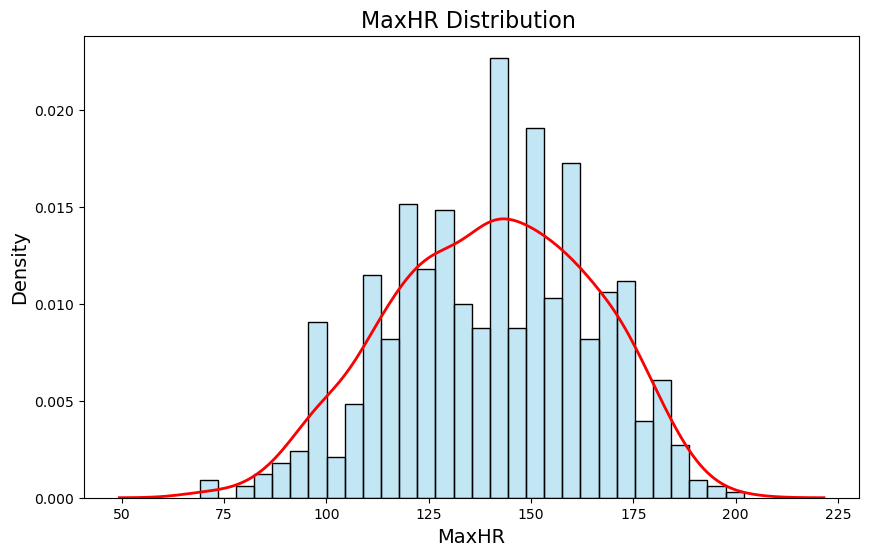

count    746.000000
mean     140.226542
std       24.524107
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64


In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxHR'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['MaxHR'], color='red', linewidth=2) 
plt.title('MaxHR Distribution ', fontsize=16)
plt.xlabel('MaxHR', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.MaxHR.describe())

- bell-shaped distribution

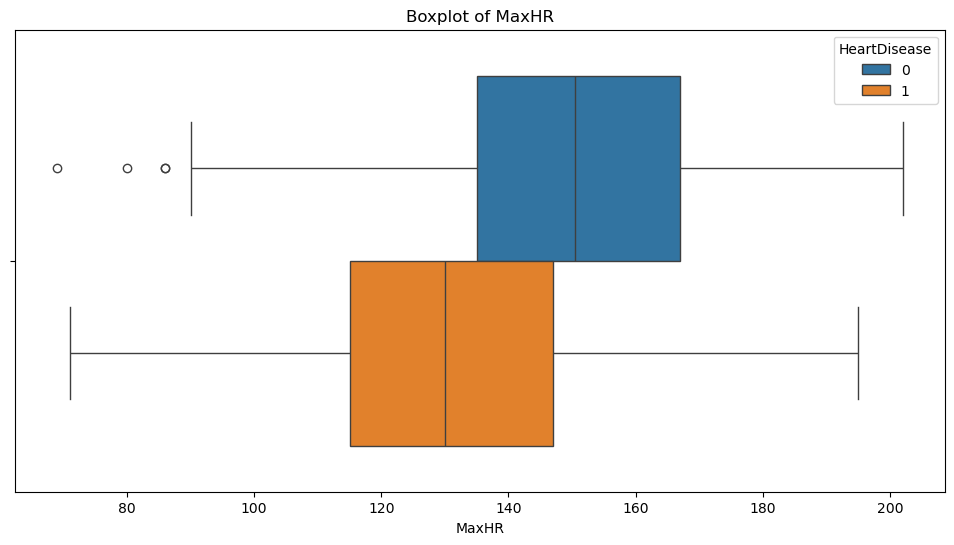

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MaxHR', data=df,hue='HeartDisease')
plt.title('Boxplot of MaxHR')
plt.xlabel('MaxHR')
plt.show()

- just few number of outliers and all fall in reasonable range, we will keep all of them

### ExerciseAngina:

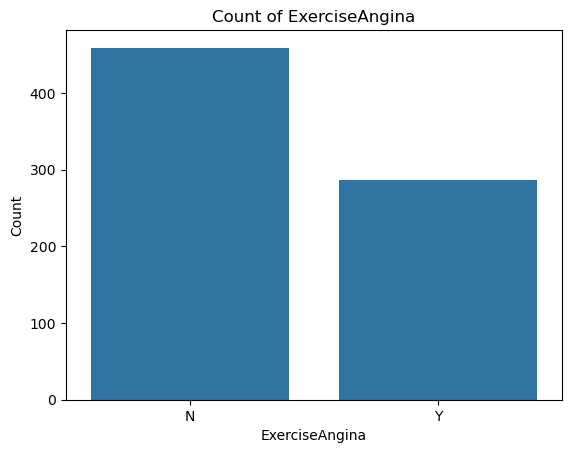

ExerciseAngina
N    459
Y    287
Name: count, dtype: int64

In [30]:
sns.countplot(x='ExerciseAngina', data=df)
plt.title('Count of ExerciseAngina')
plt.xlabel('ExerciseAngina')
plt.ylabel('Count')
plt.show()

df['ExerciseAngina'].value_counts()

### Oldpeak

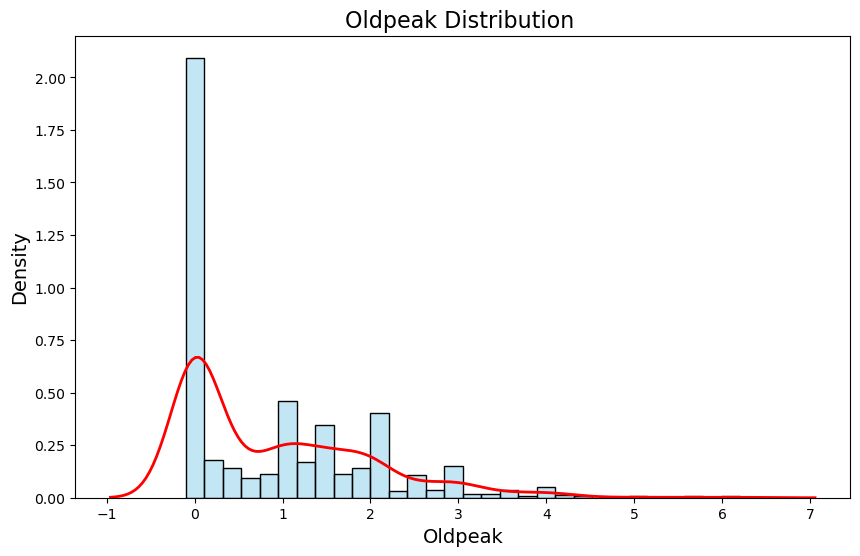

count    746.000000
mean       0.901609
std        1.072861
min       -0.100000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64


In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Oldpeak'], bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)
sns.kdeplot(df['Oldpeak'], color='red', linewidth=2) 
plt.title('Oldpeak Distribution ', fontsize=16)
plt.xlabel('Oldpeak', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()
print(df.Oldpeak.describe())

- skewed distribution identified; standardization might be needed

### ST_Slope

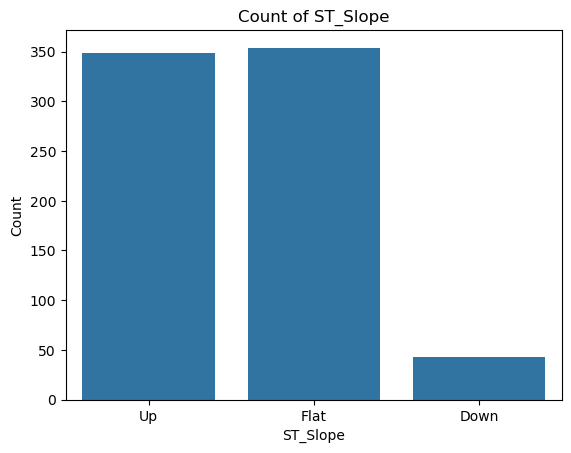

ST_Slope
Flat    354
Up      349
Down     43
Name: count, dtype: int64

In [32]:
sns.countplot(x='ST_Slope', data=df)
plt.title('Count of ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Count')
plt.show()

df['ST_Slope'].value_counts()

### Y : HeartDisease

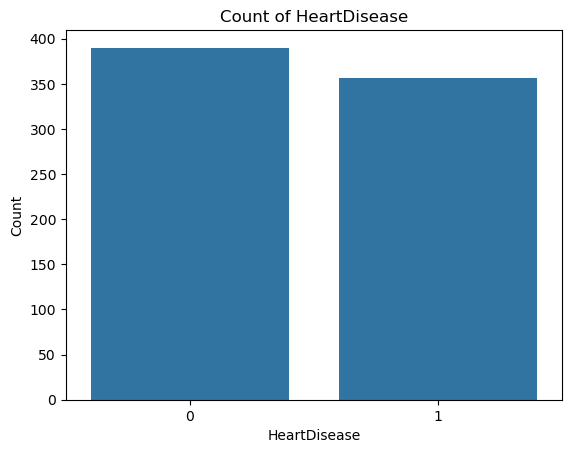

HeartDisease
0    390
1    356
Name: count, dtype: int64

In [33]:
sns.countplot(x='HeartDisease', data=df)
plt.title('Count of HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

df['HeartDisease'].value_counts()

- classes of response are almost balanced

In [34]:
df.to_csv('heart-cleaned.csv', index=False)

## Correlation analysis

In [35]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000


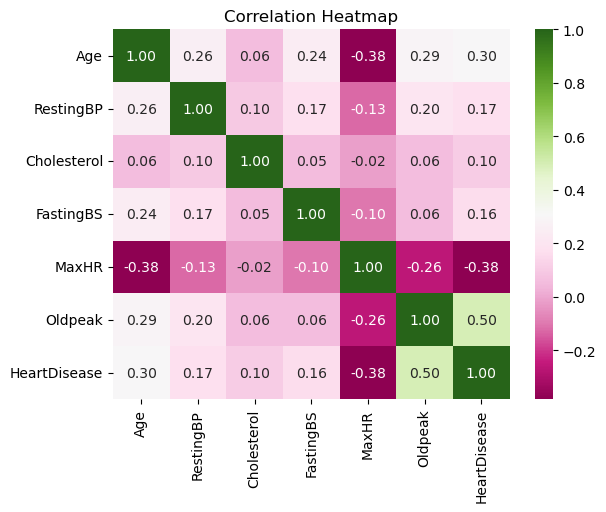

In [36]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()  

- most of the features are not having linear correlation
- (OldPeak vs Heart Dieseases) showing a correlation value 0.5, which indicates that OldPeak might be significant in contributing the response variable Y 
- The analysis of age versus maximum heart rate (MaxHR) and MaxHR versus heart diseases reveals a negative correlation of -0.38. This indicates that older individuals tend to have a lower MaxHR, while those with a lower MaxHR are more likely to have heart diseases.
- The analysis of age versus heart diseases shows a weak positive linear correlation of 0.3. This indicates that older individuals are more likely to have heart disease. Age could be another significant factor contributing to the occurrence of heart disease.

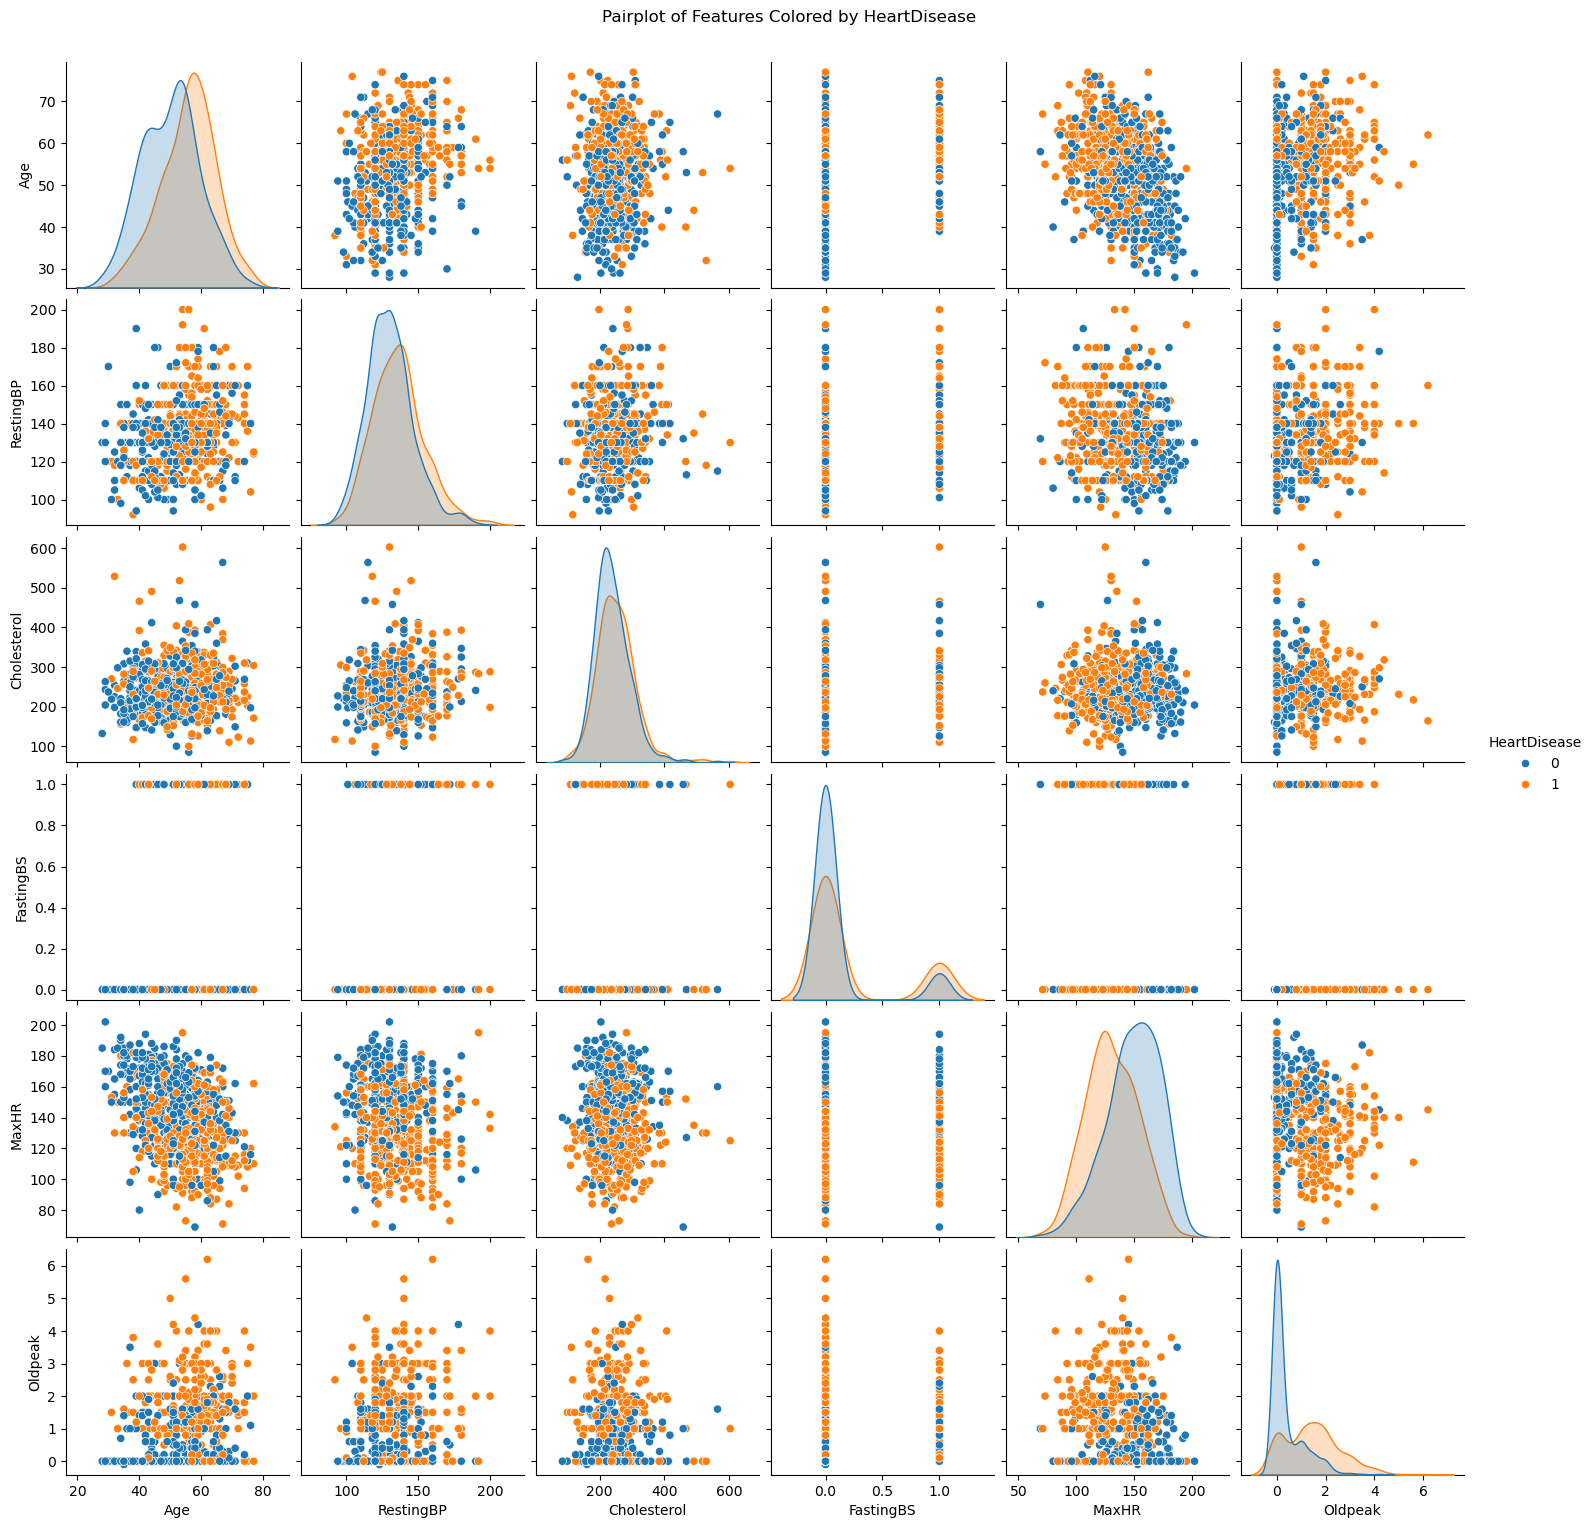

In [37]:
sns.pairplot(df, hue='HeartDisease')
plt.suptitle('Pairplot of Features Colored by HeartDisease', y=1.02)
plt.show()

# Experiment on Logistic Regression

In [38]:
from ISLP.models import (ModelSpec as MS,
                         summarize)
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
y = df['HeartDisease']
X = df.drop(columns=['HeartDisease'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [39]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
70,57,140,265,0,145,1,1,1,0,0,0,1,1,1,0
164,52,140,225,0,140,0,0,1,0,0,1,0,0,0,1
882,56,140,294,0,153,1,0,1,0,0,0,0,0,1,0
265,54,160,305,0,175,0,1,1,0,0,1,0,0,0,1
250,44,135,491,0,135,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,44,130,215,0,135,0,1,1,0,0,1,0,0,0,1
106,48,120,254,0,110,0,0,0,0,0,0,1,0,0,1
270,45,120,225,0,140,0,1,0,0,0,1,0,0,0,1
607,53,144,300,1,128,1,1,0,0,0,0,1,1,1,0


In [40]:
y_train

70     1
164    0
882    0
265    0
250    1
      ..
71     0
106    0
270    0
607    1
102    1
Name: HeartDisease, Length: 596, dtype: int64

In [41]:
design = MS(X_train.columns)
X_train_transformed = design.fit_transform(X_train)
y_train_transformed = y_train==1
X_test_transformed = design.transform(X_test)
y_test_transformed = y_test==1


In [42]:
X_train_transformed 

,intercept,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
70,1.0,57,140,265,0,145,1,1,1,0,0,0,1,1,1,0
164,1.0,52,140,225,0,140,0,0,1,0,0,1,0,0,0,1
882,1.0,56,140,294,0,153,1,0,1,0,0,0,0,0,1,0
265,1.0,54,160,305,0,175,0,1,1,0,0,1,0,0,0,1
250,1.0,44,135,491,0,135,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,44,130,215,0,135,0,1,1,0,0,1,0,0,0,1
106,1.0,48,120,254,0,110,0,0,0,0,0,0,1,0,0,1
270,1.0,45,120,225,0,140,0,1,0,0,0,1,0,0,0,1
607,1.0,53,144,300,1,128,1,1,0,0,0,0,1,1,1,0


In [43]:
y_train_transformed

70      True
164    False
882    False
265    False
250     True
       ...  
71     False
106    False
270    False
607     True
102     True
Name: HeartDisease, Length: 596, dtype: bool

In [44]:

glm = sm.GLM(y_train_transformed, X_train_transformed, family=sm.families.Binomial())
model = glm.fit()
summarize(model)

,coef,std err,z,P>|z|
intercept,-5.3510,2.008,-2.665,0.008
Age,0.0332,0.016,2.070,0.038
RestingBP,0.0158,0.008,1.930,0.054
Cholesterol,0.0008,0.002,0.363,0.717
FastingBS,0.0335,0.367,0.091,0.927
MaxHR,0.0005,0.006,0.080,0.936
Oldpeak,0.3926,0.169,2.329,0.020
Sex_M,1.5993,0.344,4.654,0.000
ChestPainType_ATA,-1.5292,0.384,-3.981,0.000
ChestPainType_NAP,-1.4902,0.331,-4.507,0.000


In [45]:
predictions_prob = model.predict(X_test_transformed)
predictions = (predictions_prob >= 0.5).astype(int)
predictions

208    0
259    0
97     0
148    0
567    1
      ..
726    0
69     0
694    0
131    1
44     1
Length: 150, dtype: int64

In [46]:
y_test

208    0
259    0
97     0
148    0
567    1
      ..
726    0
69     0
694    0
131    1
44     1
Name: HeartDisease, Length: 150, dtype: int64

In [47]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions_prob)  # Use predicted_probabilities for AUC


print(confusion_matrix(y_test, predictions))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

[[65  6]
 [10 69]]
Accuracy: 0.89
Precision: 0.92
Recall: 0.87
F1 Score: 0.90
ROC AUC: 0.96


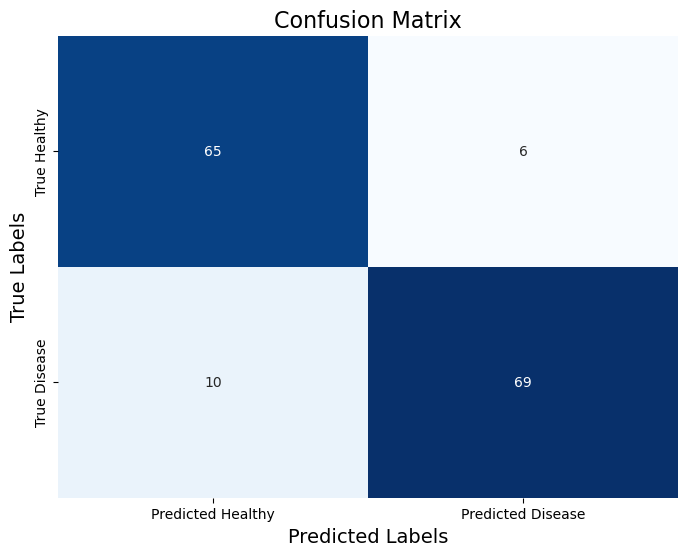

In [54]:
cm = confusion_matrix(y_test, predictions)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Healthy', 'Predicted Disease'],
            yticklabels=['True Healthy', 'True Disease'])

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

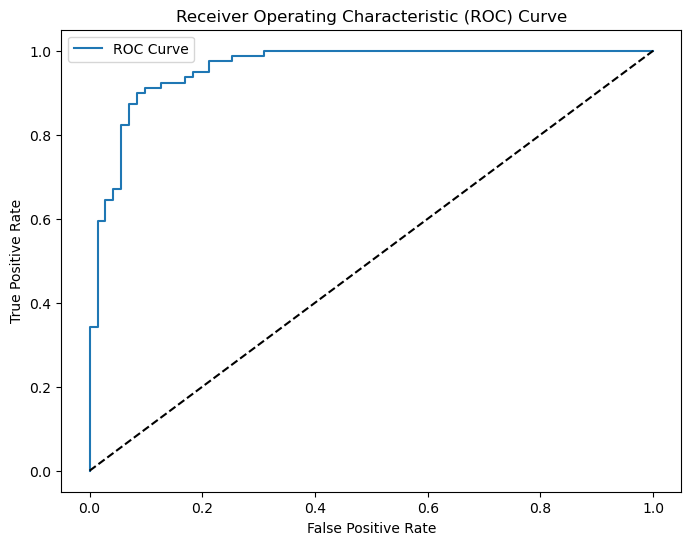

In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,predictions_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

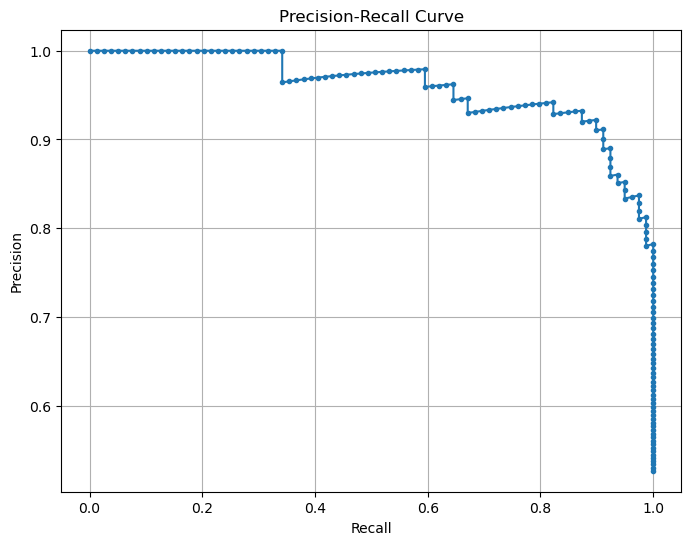

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, predictions_prob)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

In [51]:
# Assess the performance with Cross-validation
kf = StratifiedKFold(n_splits=10)

accuracy_scores = []
roc_auc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for train_index, val_index in kf.split(X_train_transformed, y_train_transformed):
    X_train, X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
    y_train, y_val = y_train_transformed.iloc[train_index], y_train_transformed.iloc[val_index]

    # Fit the model
    glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
    results = glm.fit()
    
    # Predict
    y_pred_proba = results.predict(X_val)
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)



    accuracy_scores.append(accuracy)
    roc_auc_scores.append(roc_auc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

print(f'Average Accuracy: {np.mean(accuracy_scores):.4f}')
print(f'Average ROC AUC: {np.mean(roc_auc_scores):.4f}')
print(f'Average F1 Score: {np.mean(f1_scores):.4f}')
print(f'Average Precision: {np.mean(precision_scores):.4f}')
print(f'Average Recall: {np.mean(recall_scores):.4f}')

Average Accuracy: 0.8371
Average ROC AUC: 0.9159
Average F1 Score: 0.8272
Average Precision: 0.8220
Average Recall: 0.8378
